In [35]:
from __future__ import annotations
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from typing import List

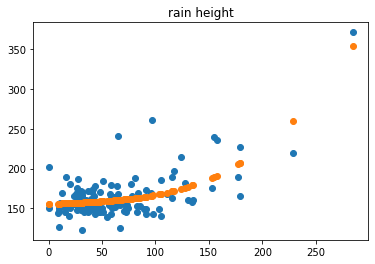

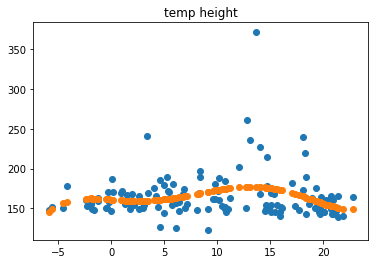

[39.445454545454545, 33.909090909090914, 35.42727272727273, 47.26363636363636, 102.68181818181819, 91.4909090909091, 98.44545454545455, 80.10909090909091, 68.17272727272729, 55.18181818181818, 44.20909090909091, 31.30909090909091]


In [68]:
df = pd.read_csv("tidy_data.csv")

plt.scatter(df["Rain_sum"],df["Height"])
z = np.polyfit(df["Rain_sum"], df["Height"], 3)
p = np.poly1d(z)
trend_h = p(df["Rain_sum"])
plt.scatter(df["Rain_sum"],trend_h)
plt.title("rain height")
plt.show()

plt.scatter(df["Mean_temp"],df["Height"])
z = np.polyfit(df["Mean_temp"], df["Height"], 5)
p = np.poly1d(z)
trend_h = p(df["Mean_temp"])
plt.scatter(df["Mean_temp"],trend_h)
plt.title("temp height")
plt.show()

y = 2009

frames = {}
for i in range(int(len(df)/12)):
    dfY = df.loc[df["Year"] == y]
    frames[y]=dfY
    y += 1
    pass


rain = [0]*12
height = [0]*12
temp = [0]*12

for df in frames.values():
    for i in range(1,len(df)+1):
        monthDf: pd.DataFrame
        monthDf = df.loc[ df["Month"] == i]

        rain[i-1] += monthDf["Rain_sum"].values[0]
        height[i-1] += monthDf["Height"].values[0]
        temp[i-1] += monthDf["Mean_temp"].values[0]


rain = [x / int(len(frames)) for x in rain]
height = [x / int(len(frames)) - 150 for x in height]
temp = [x / int(len(frames)) for x in temp]

print(rain)



[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
[39.445454545454545, 33.909090909090914, 35.42727272727273, 47.26363636363636, 102.68181818181819, 91.4909090909091, 98.44545454545455, 80.10909090909091, 68.17272727272729, 55.18181818181818, 44.20909090909091, 31.30909090909091]


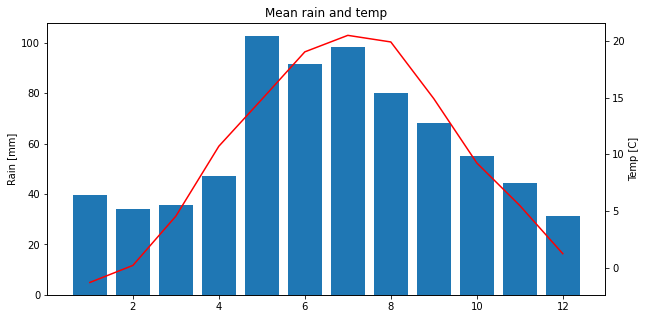

In [49]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax2 = ax1.twinx()

months = np.linspace(1,12,12).tolist()
print(months)
print(rain)
ax1.bar(months,rain)
ax1.set_ylabel("Rain [mm]")
ax2.plot(months,temp,'r')
ax2.set_ylabel("Temp [C]")
plt.title("Mean rain and temp")
plt.show()

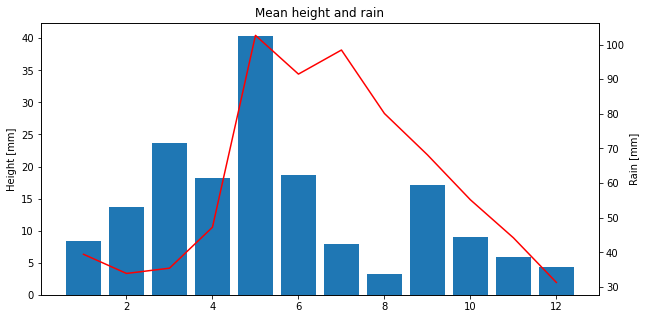

In [50]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax2 = ax1.twinx()

months = np.linspace(1,12,12).tolist()

ax1.bar(months,height)
ax1.set_ylabel("Height [mm]")
ax2.plot(months,rain,'r')
ax2.set_ylabel("Rain [mm]")
plt.title("Mean height and rain")
plt.show()

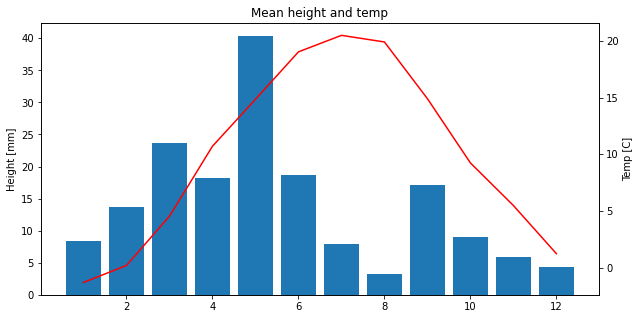

In [52]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax2 = ax1.twinx()

months = np.linspace(1,12,12).tolist()

ax1.bar(months,height)
ax1.set_ylabel("Height [mm]")
ax2.plot(months,temp,'r')
ax2.set_ylabel("Temp [C]")
plt.title("Mean height and temp")
plt.show()